In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# 1. placeholder img 
img = np.zeros((3, 3), dtype=np.uint8)
img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [3]:
# 2. Convert from 1 ch to 3 cha
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
# 3. read an image in the BGR color format (even if the file uses a grayscale format)
image = cv2.imread('tn1.png')

# 3-1 mode of imread 
# cv2.IMREAD_COLOR
# cv2.IMREAD_GRAYSCALE

k = cv2.imread('tn2.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('test.jpg', k)


True

In [6]:
# 3. Convert png to jpg 

cv2.imwrite('tn1.jpg', image)

True

In [10]:
t = cv2.imread('test.jpg')
t.shape

(1380, 2508, 3)

In [11]:
# was following this book 
## https://subscription.packtpub.com/book/data/9781789531619/2/ch02lvl1sec10/basic-i-o-scripts

# check out this 
## geeks for geeks https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/

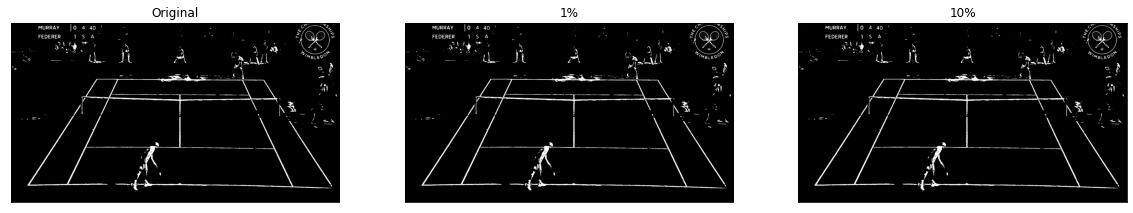

In [5]:
contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
# 적용하는 숫자가 커질 수록 Point의 갯수는 감소
epsilon1 = 0.01*cv2.arcLength(cnt, True)
epsilon2 = 0.1*cv2.arcLength(cnt, True)

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)

cv2.drawContours(img, [cnt],0,(0,255,0),3) # 215개의 Point
cv2.drawContours(img1, [approx1], 0,(0,255,0), 3) # 21개의 Point
cv2.drawContours(img2, [approx2], 0,(0,255,0), 3) # 4개의 Point

titles = ['Original', '1%', '10%']
images = [img, img1, img2]

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1,3,i+1), plt.title(titles[i]), plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.show()

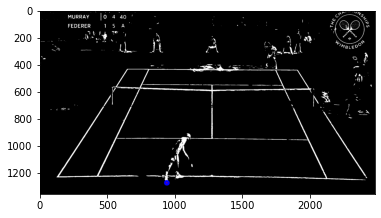

In [6]:

# 끝점 좌표 찾기
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# 좌표 표시하기
cv2.circle(img1,leftmost,20,(0,0,255),-1)
cv2.circle(img1,rightmost,20,(0,0,255),-1)
cv2.circle(img1,topmost,20,(0,0,255),-1)
cv2.circle(img1,bottommost,20,(0,0,255),-1)

img1 = cv2.drawContours(img1, cnt, -1, (255,0,0), 5)

plt.imshow(img1)

In [ ]:
# Tried Segmentation, picking up a certain color 
# https://realpython.com/python-opencv-color-spaces/